## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')
   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

## Exploring your data

### Read cleaned data from file (0.25 points)

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
# YOUR CODE HERE
cleaned_df = pd.read_csv("../data\processed/processed_data.csv")

In [5]:
# TEST
cleaned_df.head()

,datetime,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all,id_weather,main_weather,description_weather,icon_weather
0,2022-12-09 17:00:00,299.16,299.16,1010.0,94.0,299.16,299.16,1.03,0.0,40.0,802.0,Clouds,scattered clouds,03n
1,2022-12-09 18:00:00,299.16,299.16,1009.0,94.0,299.16,299.16,1.03,0.0,40.0,802.0,Clouds,scattered clouds,03n
2,2022-12-09 19:00:00,298.16,299.33,1009.0,100.0,298.16,298.16,1.03,0.0,40.0,802.0,Clouds,scattered clouds,03n
3,2022-12-09 20:00:00,298.16,298.88,1008.0,83.0,298.16,298.16,1.03,20.0,40.0,802.0,Clouds,scattered clouds,03n
4,2022-12-09 21:00:00,298.16,298.88,1008.0,83.0,298.16,298.16,1.03,50.0,40.0,802.0,Clouds,scattered clouds,03n


In [8]:
# Number of Rows and Cols
rows, cols = cleaned_df.shape
rows, cols

(8712, 14)

### Attribute's imformation & description


In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             8712 non-null   object 
 1   temp (K)             8712 non-null   float64
 2   feels_like           8712 non-null   float64
 3   pressure             8712 non-null   float64
 4   humidity             8712 non-null   float64
 5   temp_min             8712 non-null   float64
 6   temp_max             8712 non-null   float64
 7   wind_speed           8712 non-null   float64
 8   wind_deg             8712 non-null   float64
 9   clouds_all           8712 non-null   float64
 10  id_weather           8712 non-null   float64
 11  main_weather         8712 non-null   object 
 12  description_weather  8712 non-null   object 
 13  icon_weather         8712 non-null   object 
dtypes: float64(10), object(4)
memory usage: 953.0+ KB


As you can see here, all the datatype are suitable for all of the atributes

Description:

 0. datetime: The date that data is colected         
 1. temp (K): Temperature in K absolute         
 2. feels_like: Temperature that we feel in K absolute           
 3. pressure: just pressure             
 4. humidity: just humidity             
 5. temp_min: Lowest temperature of the day             
 6. temp_max: Highest temperature of the day             
 7. wind_speed: Speed of wind           
 8. wind_deg: Degree of wind           
 9. clouds_all: Cloudiness, %           
 10. id_weather: Weather condition id           
 11. main_weather: Main weather of the day         
 12. description_weather: More explicitly expalain for main weather :>  
 13. icon_weather: an icon for visualize the weather (but in this project's scope, we don't use)         

### Numerical analysis

In [11]:
df_copy = cleaned_df.drop(['datetime', 'id_weather', 'main_weather', 'description_weather', 'icon_weather'], axis='columns')

# YOUR CODE HERE
df_copy.describe().round(1)

,temp (K),feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all
count,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0,8712.0
mean,301.7,305.6,1009.5,80.2,301.7,301.7,2.9,144.4,44.5
std,2.9,5.1,2.3,16.4,2.9,2.9,1.7,111.8,22.0
min,292.2,292.4,1001.0,14.0,292.2,292.2,0.0,0.0,0.0
25%,299.2,299.3,1008.0,69.0,299.2,299.2,1.5,10.0,40.0
50%,301.2,305.8,1010.0,84.0,301.2,301.2,2.6,160.0,40.0
75%,304.2,309.6,1011.0,94.0,304.2,304.2,4.1,250.0,75.0
max,311.2,317.2,1018.0,100.0,311.2,311.2,11.3,360.0,100.0


### Describe the correlation between features in the dataset

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

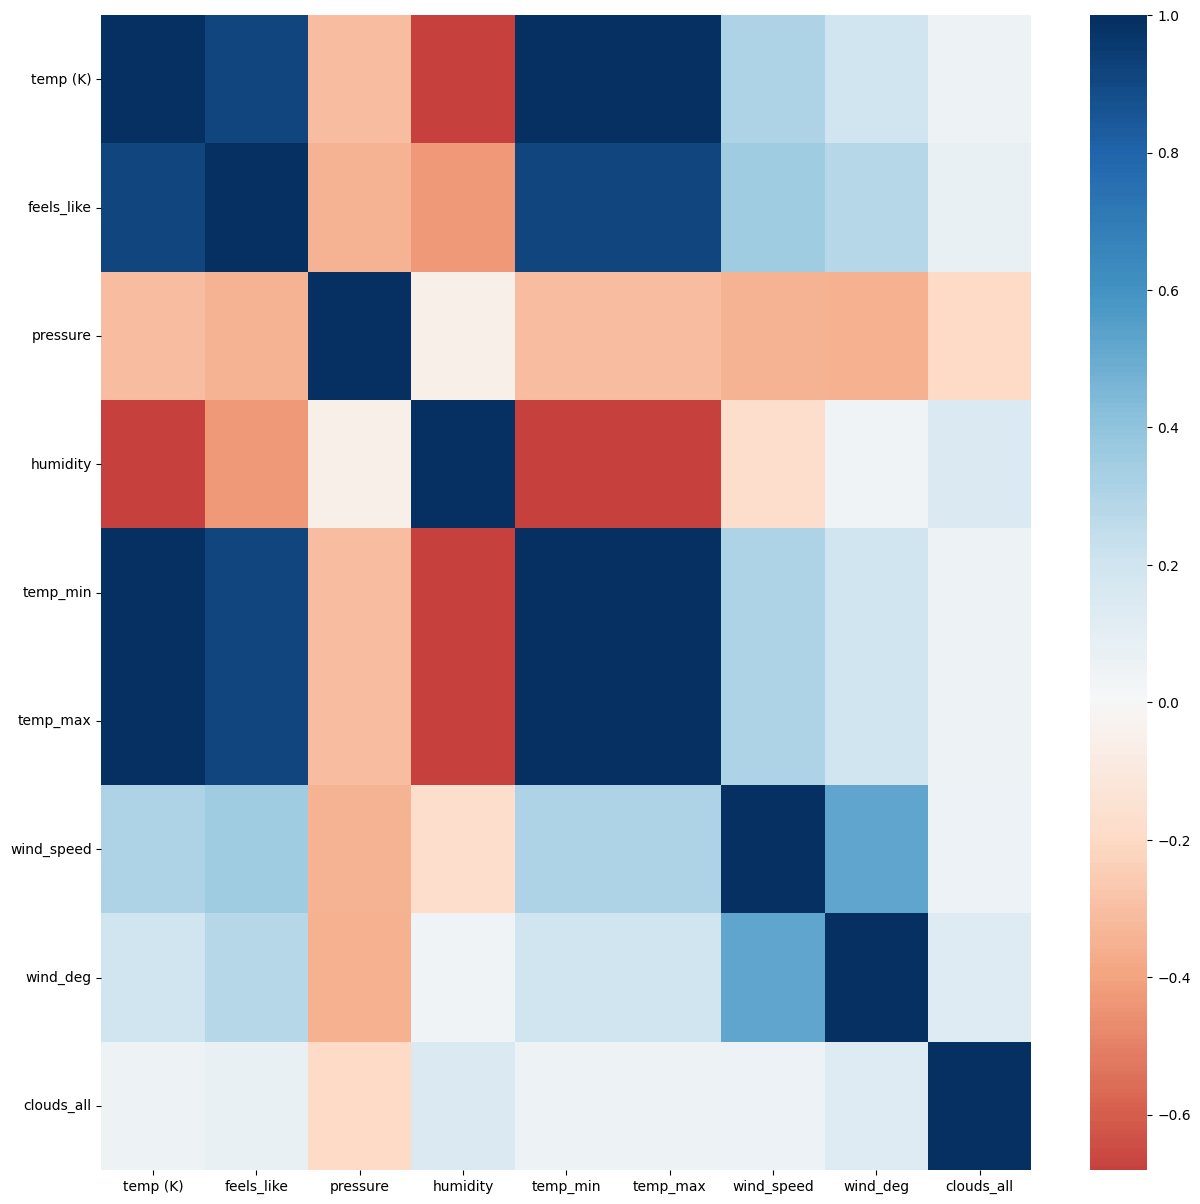

In [19]:
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
df_copy.drop(['datetime', 'id_weather', 'main_weather', 'description_weather', 'icon_weather'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

## Making questions 01?

**Question:** How are wind speed and wind direction related, and what can be drawn from it??

**Answering this question will:** Shows us the relationship between wind speed and wind direction, thereby extracting useful information in choosing direction (literally direction) for certain tasks, such as setting up tarpaulins, hang wind chimes, ..etc

**How we answer this question:** Calculate the correlation between wind speed and wind direction and visualize this relationship with a heatmap by using seaborn.

**ANSWER**

As we can see on the heatmap, these two attributes have positive linear coefficients, meaning they co-vary. We can conclude that for jobs that require wind speed, we should choose a suitable wind direction.

Note:

    if (degree>337.5) return 'Northerly';

    if (degree>292.5) return 'North Westerly';

    if(degree>247.5) return 'Westerly';

    if(degree>202.5) return 'South Westerly';
    
    if(degree>157.5) return 'Southerly';

    if(degree>122.5) return 'South Easterly';

    if(degree>67.5) return 'Easterly';

    if(degree>22.5){return 'North Easterly';}

### Analyzing to get the answer

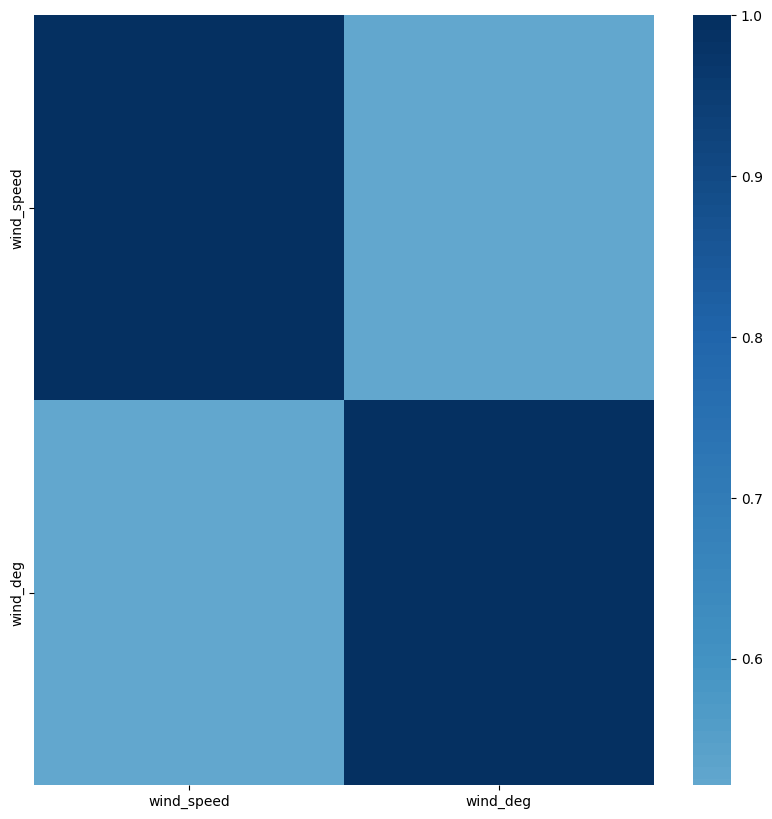

In [21]:
df_copy = cleaned_df.copy()

selected_columns = df_copy[['wind_speed', 'wind_deg']]

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

## Making question 02?

**Question:** Compare the temperature of the 5 days with the highest temperature and the 5 days with the lowest temperature ?

**Answering this question will:**  Determine the relative average temperature of the hottest and coolest days in Ho Chi Minh City, serving for future weather forecasting.

**How we answer this question:** Determine the relative average temperature of the hottest and coolest days in Ho Chi Minh City, serving for future weather forecasting.


### Analyzing to get the answer

Find country that have least renewable energy usage

In [22]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
top_5_days = df_copy.nlargest(5, 'temp (K)')
bottom_5_days = df_copy.nsmallest(5, 'temp (K)')

avg_top_5 = top_5_days['temp (K)'].mean()
avg_bot_5 = bottom_5_days['temp (K)'].mean()

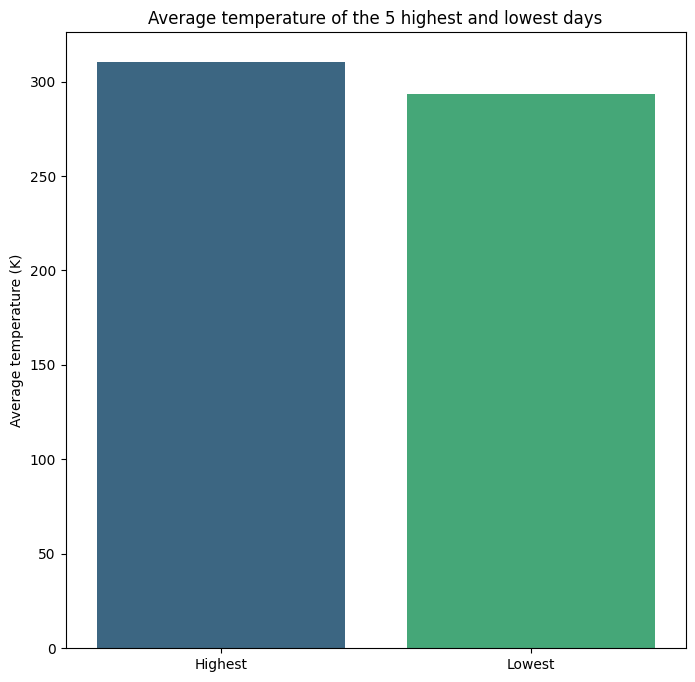

In [27]:
avg_temperatures = [avg_top_5, avg_bot_5]
labels = ['Highest', 'Lowest']

plt.figure(figsize=(8, 8))
sns.barplot(x=labels, y=avg_temperatures, palette='viridis')
plt.title('Average temperature of the 5 highest and lowest days')
plt.ylabel('Average temperature (K)')
plt.show()

## Making question 03? 

**Question:** Provides information about the distribution of humidity ?

**Answering this question will:**  The frequency of humidity in weather data can provide important information about the climate environment and can influence many other health-related activities and decisions based on humidity levels. And also partly represents the typical climate of the area.

**How we answer this question:** Draw a histogram using seaborn

**YOUR ANSWER HERE**

As we can see in the histogram, the humidity is in the very high range of 80 - 100, this partly helps us be proactive in protecting our health, and at the same time shows us the typical climate in Ho Chi Minh City.

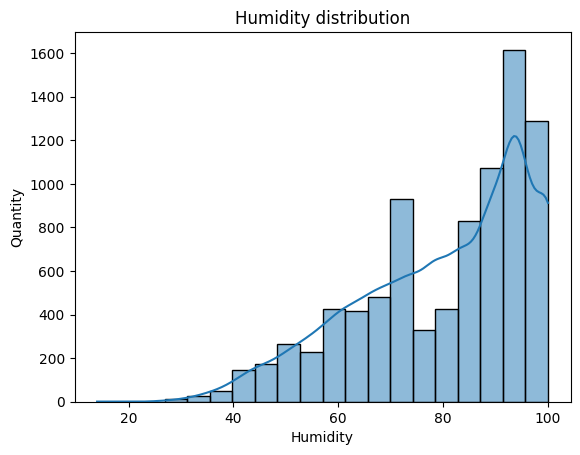

In [35]:
df_copy = cleaned_df.copy()

sns.histplot(df_copy['humidity'], bins=20, kde=True)

plt.xlabel('Humidity')
plt.ylabel('Quantity')

plt.title('Humidity distribution')

plt.show()

## Making your own question 04? 

**Question:** How does primary school enrollment rate correlate with tertiary school enrollment rate, and what does this imply for the education system in various countries?

**Answering this question will:**  Highlight the connection between primary and tertiary education access and suggest potential implications for educational policies.

**How we answer this question:** Calculate the average between primary and tertiary school enrollment rates. Visualize this using bar chart and assess the potential impact on educational policies.

**YOUR ANSWER HERE**

There are a few comments about the heat chart and bar chart below as follows:
- Based on the heat map, we can see that these two attributes have a positive correlation, meaning that if the number of students entering primary school increases, the number entering tertiary education also increases, proving that countries need to try to create conditions as well as Invest more in improving the education system.
- Based on the bar chart, we can see that the proportion of countries with many students are countries with large populations as well as stable GDP (based on the previous questions about GDP), proving that richer countries have a stable GDP. better education than countries with lower GDP

In [7]:
# Create a new dataframe
avg_primary_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_primary_df["Avg.Primary Enrollmemt"] = cleaned_df.groupby("Country")["School enrollment, primary"].mean()

# Set the index as a column - countries
avg_primary_df["Country"] = avg_primary_df.index

# Drop the index
avg_primary_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_primary_df.sort_values("Avg.Primary Enrollmemt", inplace=True, ascending=False)

# Display
avg_primary_df.head()

,Avg.Primary Enrollmemt,Country
28,134.323384,Malawi
27,124.101685,Madagascar
37,123.058705,Rwanda
34,122.451934,Namibia
47,118.728063,Togo


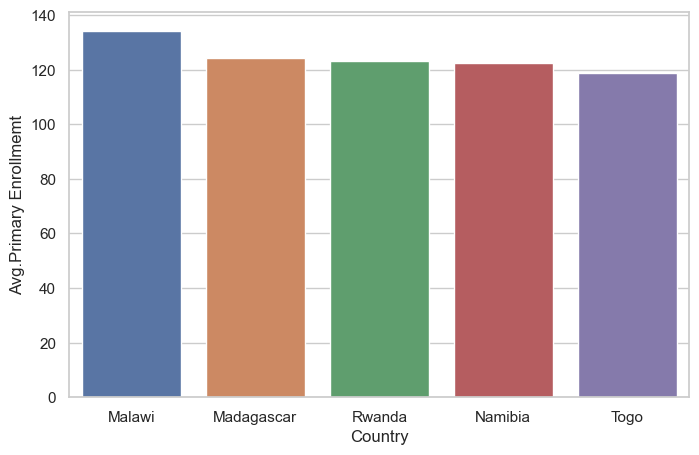

In [10]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_primary_df.head(), x="Country", y= "Avg.Primary Enrollmemt")

In [8]:
# Create a new dataframe
avg_tertiary_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_tertiary_df["Avg.Tertiary Enrollmemt"] = cleaned_df.groupby("Country")["School enrollment, tertiary"].mean()

# Set the index as a column - countries
avg_tertiary_df["Country"] = avg_tertiary_df.index

# Drop the index
avg_tertiary_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_tertiary_df.sort_values("Avg.Tertiary Enrollmemt", inplace=True, ascending=False)

# Display
avg_tertiary_df.head()

,Avg.Tertiary Enrollmemt,Country
0,29.033481,Algeria
48,27.567773,Tunisia
31,27.277143,Mauritius
14,25.388414,"Egypt, Arab Rep."
32,20.008418,Morocco


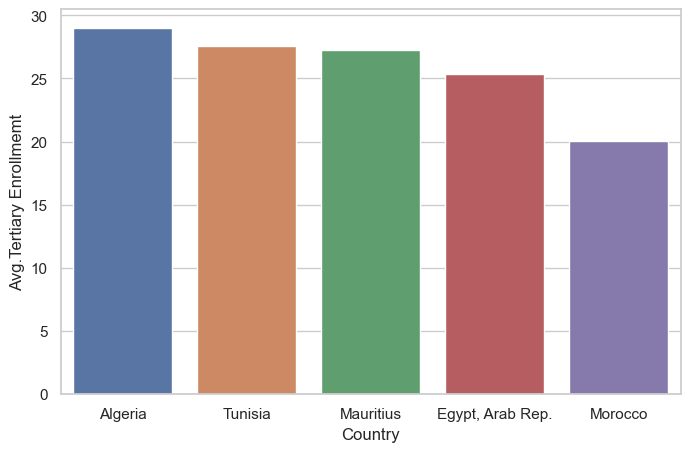

In [11]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_tertiary_df.head(), x="Country", y= "Avg.Tertiary Enrollmemt")

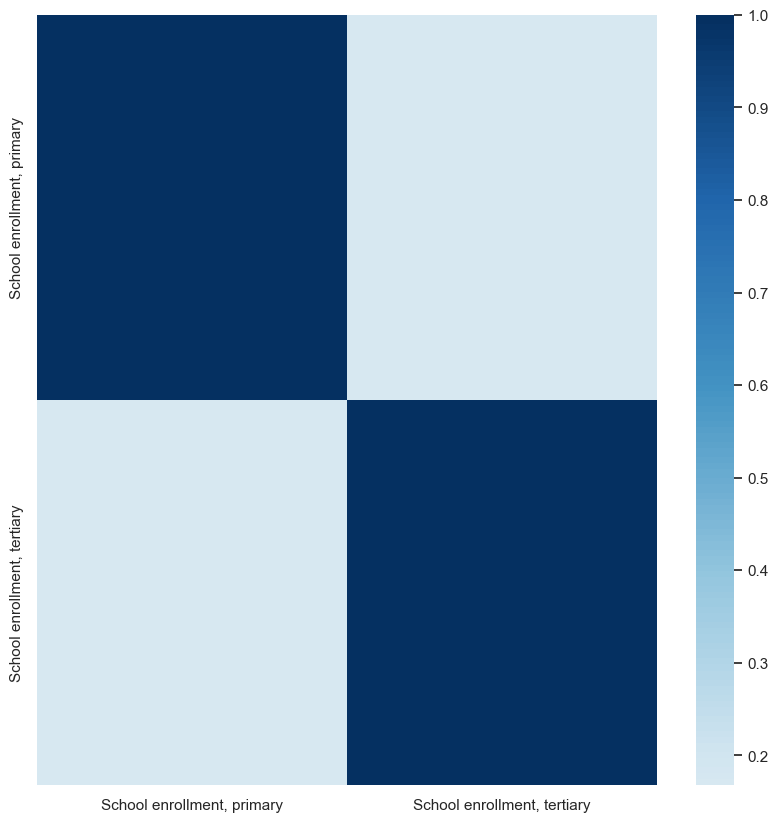

In [20]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
selected_columns = df_copy[['School enrollment, primary', 'School enrollment, tertiary']]

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(selected_columns.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

## Making your own question 05? 

**Question:** How does employment in different sectors (industry and agriculture) and what impact does it have on their economic stability?

**Answering this question will:**  Highlight the connection betweenemployment percentages in industry and agriculture access and suggest potential implications for economic stability.

**How we answer this question:** We can explore employment percentages in industry and agriculture, comparing them and examining their influence on economic stability.

**YOUR ANSWER HERE**

We can easily see this through the bar chart that the difference between the GDP of two countries with a high industrial economy compared to a country with a high agricultural economy is really huge, this can also be seen. Inferred from the more developed the world is -> the development and investment in industry is paid more attention, thereby making it possible to earn a lot of money from the industrial economy.

Finding the highest employment in industry country

In [13]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Employment in Industry(%)", ascending=False)
highest_employment_in_industry_country = sorted_df["Country"].head(1)
highest_employment_in_industry_country_df = df_copy[df_copy['Country'].isin(highest_employment_in_industry_country)]
highest_employment_in_industry_country_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
868,1262523.0,639990.0,622533.0,35.194972,10.552561,11.0,13.74374,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,95.439310,44.386631,65.847735,2022,Mauritius
869,1266334.0,641465.0,624869.0,10.300000,10.500000,11.0,23.63138,5.147591,3.116017,14.637680,...,712.608182,60.381415,41.345309,70.290000,77.240000,102.881149,43.959080,98.818207,2021,Mauritius
870,1266014.0,640853.0,625161.0,10.600000,8.700000,11.0,23.40438,5.317968,3.223432,14.826070,...,712.608182,9.410000,41.345309,70.860000,77.660000,97.968536,42.784149,95.860382,2020,Mauritius
871,1265985.0,640430.0,625555.0,10.200000,8.800000,11.0,23.93831,5.584274,3.784408,14.413370,...,712.608182,8.940000,41.345309,71.070000,77.560000,98.709282,42.664070,97.630478,2019,Mauritius
872,1265577.0,639874.0,625703.0,10.200000,8.500000,11.0,24.10495,6.203211,4.081818,15.677440,...,712.608182,9.190000,41.345309,71.270000,77.720000,99.777390,40.531071,98.322701,2018,Mauritius


Finding the highest employment in agriculture country

In [14]:
df_copy = cleaned_df.copy()
#df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')
sorted_df =df_copy.sort_values(by="Employment in Agriculture(%)", ascending=False)
highest_employment_in_agriculture_country = sorted_df["Country"].head(1)
highest_employment_in_agriculture_country_df = df_copy[df_copy['Country'].isin(highest_employment_in_agriculture_country)]
highest_employment_in_agriculture_country_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
140,12889576.0,6488650.0,6400926.0,35.194972,10.552561,8.224186,13.743740,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,103.900749,6.516800,47.148548,2022,Burundi
141,12551213.0,6319427.0,6231786.0,34.842000,7.474000,8.224186,3.619404,85.850300,93.650790,0.994591,...,712.608182,83.250000,41.345309,59.711000,63.609000,100.606888,6.286772,49.047241,2021,Burundi
142,12220227.0,6153628.0,6066599.0,35.603000,7.562000,8.224186,3.492677,86.094780,93.761570,0.976662,...,712.608182,83.520000,41.345309,59.465000,63.675000,105.158096,10.306238,49.195919,2020,Burundi
143,11874838.0,5980560.0,5894278.0,36.323000,7.352000,8.224186,3.452964,86.061500,93.781660,0.948326,...,712.608182,84.840000,41.345309,60.339000,64.347000,104.938019,10.306238,53.330379,2019,Burundi
144,11493472.0,5789861.0,5703611.0,37.011000,7.648000,8.224186,3.463570,86.176980,93.840570,0.935388,...,712.608182,85.650000,41.345309,59.821000,63.524000,107.725220,4.698550,57.223091,2018,Burundi


Visualization GDP between 2 countries

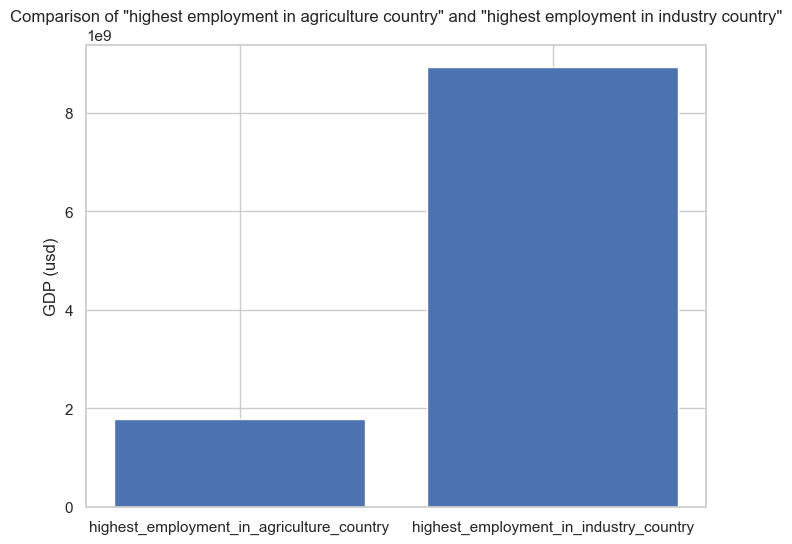

In [18]:
agriculture = highest_employment_in_agriculture_country_df['GDP in USD'].mean()
industry = highest_employment_in_industry_country_df['GDP in USD'].mean()

name_cols = ['highest_employment_in_agriculture_country', 'highest_employment_in_industry_country']

plt.figure(figsize=(8, 6))
plt.bar(name_cols, [agriculture, industry])

plt.ylabel('GDP (usd)')
plt.title('Comparison of "highest employment in agriculture country" and "highest employment in industry country"')

plt.show()